In [21]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
from __future__ import division
import os
import datetime as dtt
import seaborn as sns
import json

Populating the interactive namespace from numpy and matplotlib


In [22]:
df=pd.read_csv('201501-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [23]:
tm_temp= [str.split(i)[1] for i in df.starttime] # Separate dates from hours
df['time']= [dtt.datetime.strptime(i,"%H:%M").hour for i in tm_temp]

In [24]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]
ageMA = df.groupby('time').agg('mean')['ageM']
ageFA = df.groupby('time').agg('mean')['ageF']
tm = np.arange(0,24)
df2 = pd.DataFrame({ 'Average Male Age' : ageMA,
                         'Average Female Age' : ageFA,
                         'Time' : tm })

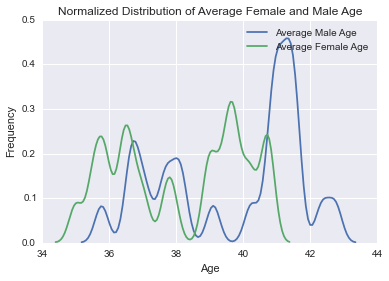

In [25]:
sns.kdeplot(ageMA, bw=.2, label="Average Male Age")
sns.kdeplot(ageFA, bw=.2, label="Average Female Age")
plt.legend()
plt.title('Normalized Distribution of Average Female and Male Age')
plt.xlabel('Age')
plt.ylabel('Frequency')